# Introdução

## [Cross-Validation: avaliando o desempenho do estimador](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)


#### Aprender os parâmetros de uma função de previsão e testá-los com os mesmos dados é um erro metodológico: um modelo que apenas repetisse os rótulos das amostras que acabara de ver teria uma pontuação perfeita, mas falharia em prever algo útil ainda. dados não vistos. 


#### Essa situação é chamada de sobreajuste. Para evitá-lo, é prática comum ao executar um experimento de aprendizado de máquina (supervisionado) manter parte dos dados disponíveis como um conjunto de testes [`X_test`, `y_test`](https://elitedatascience.com/model-training). Observe que a palavra "experimento" não se destina a indicar apenas o uso acadêmico, porque mesmo em ambientes comerciais, o aprendizado de máquina geralmente começa experimentalmente. Aqui está um fluxograma do fluxo de trabalho típico de [validação cruzada](https://www.youtube.com/watch?v=e0JcXMzhtdY&ab_channel=AnalyticsUniversity) no treinamento do modelo. Os melhores parâmetros podem ser determinados pelas técnicas de pesquisa em grade.

<br>
<img src="scikit2.png" style="height:300px">
<br>

# Demais Aplicações do Cross_Validation

#### A [validação cruzada](https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/) é uma peça essencial na caixa de ferramentas do cientista de Dados. Isso nos permite utilizar melhor nossos dados. Antes de discutirmos os cinco motivos para usar a validação cruzada, vamos examinar brevemente o que é a [validação cruzada](https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer) e mostrar algumas estratégias comuns.

#### Quando estamos construindo um modelo de aprendizado de máquina usando alguns dados, geralmente dividimos nossos dados em conjuntos de [treinamento e validação / teste](https://medium.com/analytics-vidhya/training-validation-and-test-set-in-machine-learning-7fab555c1080). O conjunto de treinamento é usado para treinar o modelo, e o conjunto de validação / teste é usado para validá-lo em dados nunca vistos antes. A abordagem clássica é fazer uma divisão simples de $80\%$ a $20\%$, às vezes com valores diferentes, como $70\%$ a $30\%$ ou $90\%$ a $10\%$. Na validação cruzada, fazemos mais de uma divisão. 

#### Podemos fazer $3$, $5$, $10$ ou qualquer número $K$ de divisões. Essas divisões são chamadas de [dobras](https://medium.com/analytics-vidhya/introduction-to-cross-validation-k-fold-7ed9cbd0ed7b) e há muitas estratégias com as quais podemos criar essas dobras.

<img src="kfold.png" align="center" width="80%">

[`Simple K-Folds`](https://medium.datadriveninvestor.com/k-fold-cross-validation-6b8518070833) - dividimos nossos dados em $K$ partes, vamos usar $K = 3$ para um exemplo de brinquedo. Se tivermos $3000$ instâncias em nosso conjunto de dados, dividimos em três partes, parte $1$, parte $2$ e parte $3$. Em seguida, construímos três modelos diferentes, cada modelo é treinado em duas partes e testado no terceiro. Nosso primeiro modelo é treinado nas partes 1 e 2 e testado na parte 3. Nosso segundo modelo é treinado nas partes $1$ e $3$ e testado na parte $2$ e assim por diante.

[`Live One Out`](https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/) - Esta é a maneira mais extrema de fazer a validação cruzada. Para cada instância em nosso conjunto de dados, construímos um modelo usando todas as outras instâncias e testamos na instância selecionada.

[`Stratified Cross-Validation`](https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e) - Quando dividimos os dados em [`folds`](https://www.kdnuggets.com/2018/10/5-reasons-cross-validation-data-science-projects.html), queremos garantir que cada parte seja um bom representante de todos os dados. O exemplo mais básico é que queremos a mesma proporção de classes diferentes em cada parte. Na maioria das vezes, isso acontece apenas aleatoriamente, mas às vezes, em conjuntos de dados complexos, precisamos aplicar uma distribuição correta para cada parte.

#### Aqui estão as cinco razões pelas quais você deve usar a Validação Cruzada:

1. Utilizar todos os dados;
2. Obter a melhor métrica;
3. Aplicação em [`Stacking`](https://towardsdatascience.com/a-practical-guide-to-stacking-using-scikit-learn-91e8d021863d) de modelos;
4. Trabalhar com dados agrupados e dependentes;
5. `Fine-Tuning` de parâmetros;

-------------

# Utilização de Cross-Validation: os cinco porquês

## 1. Utilizar TODOS os dados

<img src="utilizar_todos_dados.png" align="center" width="65%">


#### Quando temos muito poucos dados, dividí-los em conjunto de treinamento e teste pode nos deixar com um conjunto de testes muito pequeno. Digamos que temos apenas $100$ observações. Se fizermos uma divisão simples de $80$ a $20$, obteremos $20$ observações em nosso conjunto de testes. Não é suficiente. Podemos obter quase qualquer desempenho neste conjunto apenas devido ao acaso. O problema é ainda pior quando temos um projeto com várias classes. Se tivermos $10$ classes e apenas $20$ observações, nos resta apenas $2$ observações para cada classe, em média. Testar qualquer coisa em apenas duas observações não pode levar a uma conclusão real.


#### Se usarmos a validação cruzada nesse caso, construiremos $K$ modelos diferentes, para que possamos fazer previsões em todos os nossos dados. Para cada instância, fazemos uma previsão por um modelo que não viu essa observação e, portanto, estamos recebendo $100$ observações em nosso conjunto de testes. Para o problema de várias classes, obtemos $10$ observações para cada classe, em média, e é muito melhor do que apenas $2$. 

#### Depois de avaliarmos nosso algoritmo de aprendizado (veja o item 2 abaixo), agora podemos treinar nosso modelo em todos os nossos dados, porque se nossos $5$ modelos tiveram desempenho semelhante usando conjuntos de treino diferentes, assumimos que, treinando-os em todos os dados, obteremos um desempenho semelhante.

#### Ao fazer a validação cruzada, podemos usar todas as nossas $100$ observações, tanto para treinamento quanto para teste, enquanto avaliamos nosso algoritmo de aprendizado em dados nunca antes vistos.
 
____________

## 2. Obter mais MÉTRICAS

<img src="obter_metricas.png" align="center" width="60%">

#### Conforme mencionado no item $1$, quando criamos cinco modelos diferentes usando nosso algoritmo de aprendizado e o testamos em cinco conjuntos de testes diferentes, podemos ter mais confiança no desempenho do algoritmo. Quando fazemos uma única avaliação em nosso conjunto de testes, obtemos apenas um resultado. Esse resultado pode ser devido ao acaso ou a um teste enviesado por algum motivo. Treinando cinco (ou dez) modelos diferentes, podemos entender melhor o que está acontecendo. 

#### Digamos que treinamos cinco modelos e usamos a precisão como medida. Nós podemos acabar em várias situações diferentes. O melhor cenário é que nossa precisão seja semelhante em todas as nossas dobras (`folds`), por exemplo, $92.0$, $91.5$, $92.0$, $92.5$ e $91.8$. Isso significa que nosso algoritmo e nossos dados são consistente e podemos ter certeza de que, treinando-o em todos os conjuntos de dados e implantando-os na produção, resultará em desempenho semelhante.

#### No entanto, poderíamos terminar em um cenário um pouco diferente, como $92.0$, $44.0$, $91.5$, $92.5$ e $91.8$. Esses resultados parecem muito estranhos. Parece que uma de nossas dobras é de uma distribuição diferente. Temos que voltar e garantir que nossos dados sejam o que achamos que são.

#### O pior cenário em que podemos acabar é quando temos uma variação considerável em nossos resultados, digamos $80.1$, $44.3$, $99.2$, $60$ e $87.0$. Aqui parece que nosso algoritmo ou nossos dados,ou ambos, não são consistentes, pode ser que nosso algoritmo é incapaz de aprender ou nossos dados são muito complicados.


#### Usando a validação cruzada, podemos obter mais métricas e tirar conclusões importantes sobre nosso algoritmo e nossos dados.

_____________

## 3. Utilizar STACKING de modelos

<img src="stacking_de_modelos.png" align="center" width="60%">

#### Às vezes, queremos (ou precisamos) criar um [`pipeline`](https://scikit-learn.org/stable/modules/compose.html) de modelos para resolver alguma coisa. Pense em redes neurais, por exemplo. Nós podemos criar muitas camadas. Cada camada pode usar a visualização da camada e aprender uma nova representação de nossos dados para, eventualmente, conseguir produzir boas previsões. Somos capazes de treinar essas diferentes camadas porque usamos o algoritmo de retropropagação. Cada camada calcula seu erro e o passa de volta para a camada anterior.


#### Quando fazemos algo semelhante, mas não usamos redes neurais, não podemos treiná-lo da mesma maneira, porque nem sempre existe um "erro" (ou derivado) claro que podemos transmitir.


#### Por exemplo, podemos criar um modelo de floresta aleatória (ou Random Forest) que prevê algo para nós e, logo depois, queremos fazer uma regressão linear que se baseie em previsões anteriores e produza algum número real.


#### A parte crítica aqui é que nosso segundo modelo deve aprender sobre as previsões de nosso primeiro modelo. A melhor solução aqui é usar dois conjuntos de dados diferentes para cada modelo. Nós treinamos nossa Floresta Aleatória no conjunto de dados `A`. Em seguida, usamos o conjunto de dados `B` para fazer uma previsão usando-o. Em seguida, usamos as previsões do conjunto de dados `B` para treinar nosso segundo modelo (a regressão logística) e, finalmente, usamos o conjunto de dados `C` para avaliar nossa solução completa. Fazemos previsões usando o primeiro modelo, passamos para o nosso segundo modelo e depois as comparamos com a verdade fundamental.


#### Quando temos dados limitados (como na maioria dos casos), não podemos realmente fazê-lo. Além disso, não podemos treinar os dois modelos no mesmo conjunto de dados, porque, então, nosso segundo modelo aprende sobre as previsões que nosso primeiro modelo já viu. Provavelmente estes serão excessivamente ajustados ou, pelo menos, terão melhores resultados do que em um conjunto diferente. Isso significa que nosso segundo algoritmo não é treinado para o que será testado. Isso pode levar a diferentes efeitos em nossas avaliações finais que serão difíceis de entender.


#### Ao usar a validação cruzada, podemos fazer previsões em nosso conjunto de dados da mesma maneira descrita anteriormente e, portanto, a entrada de nossos modelos do segundo serão previsões reais sobre dados que nosso primeiro modelo nunca viu antes.

_________________

## 4. Trabalhar com dados DEPENDENTES / AGRUPADOS

<img src="dados_dependentes_agrupados.png" align="center" width="70%">

#### Quando realizamos um `train-test split` de nossos dados, assumimos que nossos exemplos são independentes. Isso significa que, conhecer / ver alguma instância não nos ajudará a entender outras instâncias. No entanto, esse nem sempre é o caso.

#### Considere um sistema de reconhecimento de fala. Nossos dados podem incluir diferentes palestrantes dizendo palavras diferentes. Vejamos o reconhecimento de dígitos falados. Neste conjunto de dados, por exemplo, existem $3$ alto-falantes e $1500$ gravações ($500$ para cada alto-falante). Se fizermos uma divisão aleatória, nosso conjunto de treinamento e teste compartilhará o mesmo orador dizendo as mesmas palavras! Obviamente, isso aumentará o desempenho do algoritmo, mas uma vez testados em um novo alto-falante, nossos resultados serão muito piores.

#### A maneira correta de fazer isso é dividir os alto-falantes, ou seja, use dois alto-falantes para treinamento e o terceiro para testes. No entanto, testaremos nosso algoritmo apenas em um alto-falante. Não é suficiente. Precisamos saber o desempenho do nosso algoritmo em diferentes alto-falantes.

#### Podemos usar a validação cruzada no nível dos alto-falantes. Treinaremos três modelos, cada vez usando um alto-falante para teste e outros dois para treinamento. Dessa forma, poderemos avaliar melhor nosso algoritmo (como descrito acima) e finalmente construir nosso modelo em todos os alto-falantes.

___________

## 5. Fine TUNNING de Parâmetros

<img src="tunando_hiperparametros.png" align="center" width="60%">

#### O Consjunto de treinamento é o conjunto de dados utilizados para treinar o modelo, aperfeiçoando parâmetros.o modelo realizarás suas predições com base no que aprender em treino. O conjunto de validação é é um conjunto separado, usado para validar o modelo, durante o treinamento, ajudando a obter informaçõesque auxiliam o ajuste dos hiperparâmetros, muito útil para evitar que os dados sofram `overfiting` no ocnjunto de trinamento (double check). O conjunto de teste é utilizado para testar o modelo após este ter sido treinado, separado dos outros conjuntos, é utilizado após a fase da validação.

#### Dividindo nossos dados em três conjuntos, em vez de dois, abordaremos os mesmos problemas de que falamos antes, especialmente se não tivermos muitos dados. Ao fazer a validação cruzada, podemos executar todas essas etapas usando um único conjunto.

____________

## Conclusão

#### A validação cruzada é uma ferramenta muito poderosa. Isso nos ajuda a usar melhor nossos dados e fornece muito mais informações sobre o desempenho do nosso algoritmo. Em modelos complexos de aprendizado de máquina, às vezes é fácil não prestar atenção suficiente e usar os mesmos dados em diferentes etapas do pipeline. Isso pode levar a um desempenho bom, mas não real, na maioria dos casos, ou introduzir efeitos colaterais estranhos em outros. Temos que prestar atenção em que confiamos em nossos modelos. A validação cruzada nos ajuda quando lidamos com desafios não triviais em nossos projetos de ciência de dados.

----

# Funcionamento da Validação de Modelos (Cross Validation)

#### Há sempre a necessidade de validar a estabilidade do seu modelo. Você simplesmente não pode ajustar o modelo aos seus dados de treinamento e esperar que funcione com precisão para os dados reais que nunca viu antes. Você precisa de algum tipo de garantia de que o seu modelo tenha corrigido a maioria dos padrões dos dados, e não esteja captando muito o ruído ou, em outras palavras, um viés.

#### O processo de decidir se os resultados numéricos, quantificando relações hipotetizadas entre variáveis, são aceitáveis como descrições dos dados, é conhecido como validação. Geralmente uma estimativa de erro para o modelo é feita após o treinamento, mais conhecido como avaliação de resíduos. Nesse processo, é feita uma estimativa numérica da diferença nas respostas previstas e originais, também chamada de erro de treinamento. No entanto, isso só nos dá uma idéia sobre o quão bem o nosso modelo faz em dados usados para treiná-lo. Agora é possível que o modelo esteja subajustando ou super adaptando os dados. Assim, o problema com essa técnica de avaliação é que ela não fornece uma indicação de quão bem o aluno irá generalizar para um conjunto de dados independente / invisível. Obter essa ideia sobre o nosso modelo é conhecido como validação cruzada. ([Cross-Validation in Machine Learning](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f))

## Hiperparâmetros e validação de modelos

#### O processo para construção de um modelo de aprendizado de máquina supervisionado pode ser divido em:

- Escolha de uma classe de modelo;

- Escolha dos hiperparâmetros do modelo;

- Ajuste do modelo aos dados de treinamento;

- Uso do modelo para prever rótulos para novos dados.

#### As duas primeiras partes disso - a escolha do modelo e a escolha dos hiperparâmetros - talvez sejam a parte mais importante do uso dessas ferramentas e técnicas de maneira eficaz. Para fazer uma escolha informada, precisamos de uma maneira de validar que nosso modelo e nossos hiperparâmetros são adequados aos dados. Enquanto isso pode parecer simples, existem algumas armadilhas que você deve evitar para fazer isso de forma eficaz.

## Validação de Modelo na prática

<br>
<img src="validation_set.png" style="height:300px">
<br>

#### Em princípio, a validação do modelo é muito simples: depois de escolher um modelo e seus hiperparâmetros, podemos estimar o quão eficaz ele é aplicando-o a alguns dos dados de treinamento e comparando a previsão com o valor conhecido.
___________

# Exemplo

#### Vamos estudar um exemplo do uso de validação cruzada para calcular as curvas de validação de uma classe de modelos. Aqui, vamos usar um modelo de *regressão polinomial*: é um modelo linear generalizado, em que o grau dos polinômios é um parâmetro configurável. 

#### Por exemplo, um polinômio de grau $1$ ajusta uma linha reta aos dados; para os parâmetros coeficiente linear $a$, coeficiente angular $b$ e saída $y$ do modelo: 

$$
y = ax + b
$$

### Um polinômio de grau $3$ ajusta uma curva cúbica aos dados; para parâmetros $a, b, c, d$: 

$$
y = ax^3 + bx^2 + cx + d
$$

#### Isso pode ser generalizado a qualquer número de recursos polinomiais.

#### Em `Scikit-Learn`, é possível implementar esse modelo com uma simples regressão linear combinada com o pré-processador polinomial (polynomial preprocessor).

#### É vantajoso usar um `pipeline` para organizar essas operações sequencialmente. 

## Importando as bibliotecas

In [1]:
# importando as bibliotecas
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


## Definindo uma função para aplicação de regressão linear

#### Esta função permite a aplicação de função exponencial polinomial para as features dos dados

In [2]:
# definindo uma função para o pipeline para uma regressão polinimial
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

## Criando os dados

#### Agora vamos criar alguns dados sintéticos (artificiais, inventados), aos quais o nosso modelo será ajustado em seguida.

In [3]:
# iportando as bibliotecas
import numpy as np

# definindo uma função para gerar dados
def make_data(N, err = 1.0, rseed = 1):
    '''
    Randomly sample the data
    '''
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [4]:
X.shape,y.shape

((40, 1), (40,))

#### Agora podemos visualizar nossos dados, junto com os ajustes polinomiais de vários graus. Este código é auxiliar e não é necessário entender todos os detalhes para seguir o exemplo.

## Verificação da aderência aos dados

#### Podemos identificar qual é o grau da função polinomial que mais se adapta à configuração dos dados

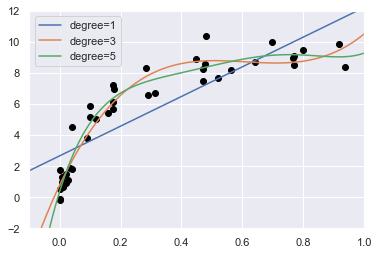

In [5]:
# importando as bibliotecas
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting

# definindo um vetor bidimensional para novos dados de entrada com 500 pontos
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

# plotando uma dispersão com os dados gerados originalmente
plt.scatter(X.ravel(), 
            y, 
            color = 'black' 
           )
axis = plt.axis()

# criando predições de funções com graus 1,3 e 5 com PolynomialRegression
# plotando os gráficos destas funções 
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), 
             y_test, 
             label = 'degree={0}'.format(degree)
            )
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

#### Nesse caso, "o botão" que controla a complexidade do modelo é o grau do polinômio, que pode ser qualquer inteiro não negativo.

#### Uma interessante pergunta a ser feita: qual grau de polinômio fornece um compromisso apropriado entre viés (superajuste do treino) e variância (subajuste do teste)?

- Variância: A diferença no ajuste do modelo entre diferentes `datasets` de treino e de teste.

- Viés, a condição de um modelo superajustado (`overfiting`) ao conjunto de treino


#### Podemos prosseguir visualizando a curva de validação para este conjunto de dados e modelo específicos; isso pode ser feito facilmente usando a função [`validation_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html), fornecida por `Scikit-Learn`.

#### Dado um modelo, um conjunto de dados, um nome de parâmetro e um intervalo a ser explorado, essa função calculará automaticamente tanto o `score` de treinamento como o `score` de validação ao longo do intervalo.

## Verificação do parâmetro que mais adere aos dados (grau da polinomial).

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


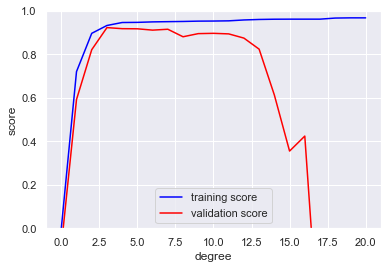

In [6]:
# importando as bibliotecas
from sklearn.model_selection import validation_curve

# obendo os scores de validação para treino e teste
# utilizando a classe validation curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), 
                                          X, 
                                          y, 
                                          'polynomialfeatures__degree', 
                                          degree, 
                                          cv = 7
                                         )

# plotando as curvas de teste e validação
plt.plot(degree, 
         np.median(train_score, 1), 
         color = 'blue', 
         label = 'training score'
        )
plt.plot(degree, 
         np.median(val_score, 1), 
         color = 'red', 
         label = 'validation score'
        )
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [7]:
val_score.ravel().max()

0.9756825288230457

In [8]:
np.where(val_score == val_score.ravel().max())

(array([9], dtype=int64), array([4], dtype=int64))

#### Este gráfico mostra precisamente o comportamento qualitativo que esperamos: o `score` de treinamento sempre é maior que o `score` de validação; o `score` de treinamento cresce lentamente junto com a complexidade do modelo; e o `score` de validação atinge um máximo antes de finalmente começar a cair à medida que o modelo é superajustado. 

#### A partir da curva de validação, é possível interpretar que o compromisso ideal entre viés e variância é encontrado com um polinômio de terceira ordem; podemos calcular e mostrar esse ajuste sobre os dados originais.

## Plotando o gráfico de melhor ajuste da curva 

#### Vamos utilizar uma função da polinomial de grau $3$ para plotar a curva de malor ajuste aos pontos.

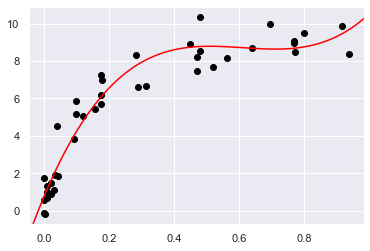

In [9]:
# plotando o gráfico de melhor ajuste
plt.scatter(X.ravel(), 
            y, 
            color = 'black'
           )
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), 
         y_test,color = 'red'
        );
plt.axis(lim);

#### Note que encontrar esse modelo ideal não exigiu que fosse calculado apenas o `score` de treinamento, mas examinando o relacionamento entre os `scores` de treinamento e validação, conseguimos obter um insight válido sobre o desempenho do modelo.

____________

# MATERIAL COMPLEMENTAR

#### Há várias formas de visualização do comportamento de [validação cruzada](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py) no scikit-learn

#### A escolha do objeto de validação cruzada correto é uma parte crucial do ajuste adequado de um modelo. Existem várias maneiras de dividir dados em conjuntos de treinamento e teste, a fim de evitar o ajuste excessivo do modelo, padronizar o número de grupos nos conjuntos de testes etc.

#### Este exemplo visualiza o comportamento de vários objetos comuns do `scikit-learn` para comparação.

<br>
<img src="scikit_learn.png" style="height:1000px">
<br>

________

# Dicas para os alunos participarem da comunidade de Machine Learning e Ciência de Dados

## Ciênica de dados do Banco BCG
[BCG](https://www.bcg.com/pt-br/default.aspx)

## Google oferece projetos para participação remunerada
[Google Summer of Code](https://summerofcode.withgoogle.com/)

## Eventos na área de Ciência de Dados
[Meetup](https://www.meetup.com/pt-BR/#_=_)

## Canal no Youtube do Nubank
[Nubank on the Stage](https://www.youtube.com/results?search_query=nubank+on+the+stage)

## Comunidade organizadora de eventos mundias em Ciência de Dados
[PAPIs](https://www.papis.io/)

## Ferramenta do Facebook para séries temporais
[FBProphet](https://facebook.github.io/prophet/docs/quick_start.html)

## Comunidade de Ciência de Dados
[Data Hackers](https://datahackers.com.br/0)

## Livro com conceitos de Python para Machine Learning
[Python Data Science Handbook: Essential Tools for Working with Data](https://play.google.com/store/books/details?id=6omNDQAAQBAJ&rdid=book-6omNDQAAQBAJ&rdot=1&source=gbs_atb&pcampaignid=books_booksearch_atb)
